Let $A,B$ denote the events we’re betting on.  
Let $X_A, X_B < 1$ denote the implied win probabilities of $A$ and $B$ (Note: These can add up to more than $1$ given the Spread).  
Let $S_A, S_B$ denote stakes on $A$ and $B$.  
Let $P$ denote the total payout.  
Let $S_{\mathrm{FB}}$ denote the free bet we have.

WLOG, set $S_A = S_{\mathrm{FB}}$  

$$P = S_{\mathrm{FB}} * {\frac{1}{X_A}} - S_{\mathrm{FB}} = S_B * {\frac{1}{X_B}}$$

Solving for $S_B$:  
$$S_{\mathrm{FB}} * {\frac{1 - X_A}{X_A}} = S_B * {\frac{1}{X_B}}$$
$$S_B = S_{\mathrm{FB}} * {\frac{(1 - X_A) * X_B}{X_A}}$$

Value of $S_{\mathrm{FB}}$ made from hedging (${\frac{Revenue - Stake}{S_{\mathrm{FB}}}}$) :  

$${\frac{P - S_B}{S_{\mathrm{FB}}}} = S_{\mathrm{FB}} * {\frac{1 - X_A}{X_A}} - S_{\mathrm{FB}} * {\frac{(1 - X_A) * X_B}{X_A}}$$

$$
 = \boxed{\frac{(1 - X_A)(1 - X_B)}{X_A}\, S_{\mathrm{FB}}}
$$


Let $ \Pr(A') = X_A - X_{\mathrm{Edge}}$, Where $\Pr(B') = X_B. $ Where $\Pr(A'), \Pr(B')$ are the actual implied probability of Event $A, B$ occuring


In [5]:
#Set Variables
prob_a_prime = 0.2
x_edge = 0

prob_b_prime = 1 - prob_a_prime

x_a = x_edge + prob_a_prime
x_b = prob_b_prime

s_fb_value = (1 - x_a) * (1 - x_b) / (x_a)
print(s_fb_value)

0.7999999999999998


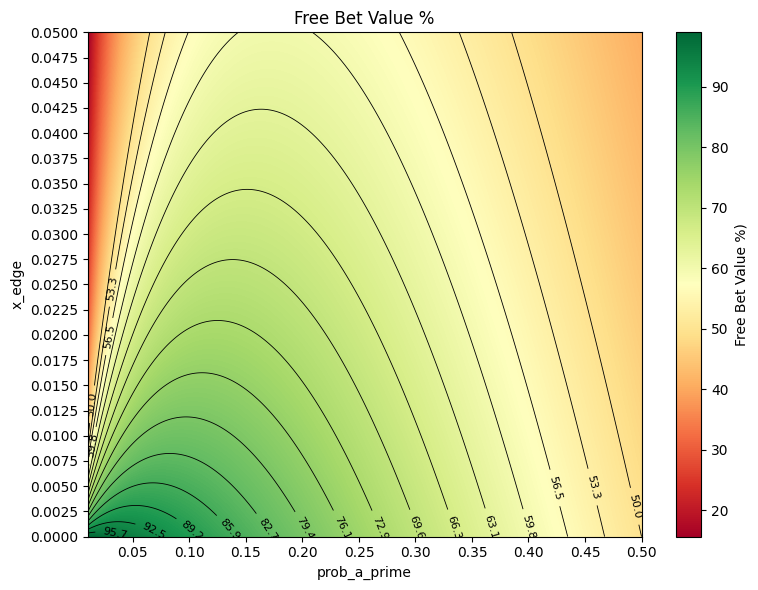


Table with exact values


prob_a_prime,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50
x_edge,,,,,,,,,,
0.0000,95.00,90.00,85.00,80.00,75.00,70.00,65.00,60.00,55.00,50.00
0.0025,90.24,87.56,83.36,78.77,74.01,69.17,64.29,59.38,54.45,49.50
0.0050,85.91,85.24,81.77,77.56,73.04,68.36,63.59,58.77,53.90,49.01
0.0075,81.96,83.02,80.24,76.39,72.09,67.56,62.90,58.16,53.36,48.52
0.0100,78.33,80.91,78.75,75.24,71.15,66.77,62.22,57.56,52.83,48.04
0.0125,75.00,78.89,77.31,74.12,70.24,66.00,61.55,56.97,52.30,47.56
0.0150,71.92,76.96,75.91,73.02,69.34,65.24,60.89,56.39,51.77,47.09
0.0175,69.07,75.11,74.55,71.95,68.46,64.49,60.24,55.81,51.26,46.62
0.0200,66.43,73.33,73.24,70.91,67.59,63.75,59.59,55.24,50.74,46.15


In [28]:
S_FB = 100.0
prob_a_min, prob_a_max = 0.01, 0.50
x_edge_min, x_edge_max = 0.00, 0.05
n_prob_a, n_x_edge = 500, 500

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# --- Build grids ---
prob_a_vals = np.linspace(prob_a_min, prob_a_max, n_prob_a)
x_edge_vals = np.linspace(x_edge_min, x_edge_max, n_x_edge)
PA, XE = np.meshgrid(prob_a_vals, x_edge_vals)

# Derived probabilities
XB = 1.0 - PA          # x_b
XA = XE + PA           # x_a

# Intended formula (matches earlier boxed expression): ((1 - x_a)(1 - x_b)) / x_a
eps = np.finfo(float).eps
den = np.where(XA == 0, eps, XA)
sfb_ratio = ((1.0 - XA) * (1.0 - XB)) / den
sfb_amount = sfb_ratio * S_FB

# --- Heatmap with labeled contours (amounts) ---
plt.figure(figsize=(8, 6))
im = plt.imshow(
    sfb_amount,
    origin='lower',
    aspect='auto',
    extent=[prob_a_vals.min(), prob_a_vals.max(), x_edge_vals.min(), x_edge_vals.max()],
    cmap='RdYlGn'  # red -> yellow -> green
)
cbar = plt.colorbar(im, label=f"Free Bet Value %)")
plt.xlabel("prob_a_prime")
plt.ylabel("x_edge")
step = 0.05
first = np.ceil((prob_a_min - 0.0) / step) * step  # anchor at 0.00
ticks = np.round(np.arange(first, prob_a_max + 1e-12, step), 10)
plt.xticks(ticks)
plt.yticks(np.arange(x_edge_min, x_edge_max + 1e-12, 0.0025))
plt.title("Free Bet Value %")

# Add a few labeled contour lines for exact amounts
# (Contour needs grid coordinates PA, XE, not the extent.)
levels = np.linspace(50, np.nanmax(sfb_amount), 16)
CS = plt.contour(PA, XE, sfb_amount, levels=levels, colors='k', linewidths=0.6)
plt.clabel(CS, inline=True, fontsize=8, fmt="%.1f")

plt.tight_layout()
plt.show()

# --- Tables of exact values at selected points ---
# prob_a by 0.025; x_edge by 0.0025
sample_prob_a = np.round(np.arange(0.05, 0.50 + 1e-12, 0.05), 3)
sample_x_edge = np.round(np.arange(0.00, 0.05 + 1e-12, 0.0025), 4)


rows = []
for pa in sample_prob_a:
    for xe in sample_x_edge:
        xa = pa + xe
        xb = 1.0 - pa
        ratio = ((1.0 - xa) * (1.0 - xb)) / max(xa, eps)
        rows.append({
            "x_edge": xe,
            "prob_a_prime": pa,
            "s_fb_ratio": ratio,
            f"s_fb_amount (S_FB={S_FB:g})": ratio * S_FB
        })

df = pd.DataFrame(rows)

# Pivot for readability: rows=x_edge, columns=prob_a_prime
pivot_amount = df.pivot(index="x_edge", columns="prob_a_prime", values=f"s_fb_amount (S_FB={S_FB:g})")
pivot_ratio  = df.pivot(index="x_edge", columns="prob_a_prime", values="s_fb_ratio")

print("\nTable with exact values")
display(pivot_amount.round(2))

